## Grid Sapientino.

Level of abstraction "one", with restraining bolts.

The goal is to visit N colors in a certain order.

In [15]:
%matplotlib inline

import numpy as np
from gym_sapientino.core.configurations import SapientinoConfiguration
import matplotlib.pyplot as plt
import multiprocessing
from multinav.helpers.misc import set_seed, stats_from_env, plot_average_stats, Experiment

from gym.wrappers import TimeLimit
from multinav.algorithms.q_learning import q_learning
from gym_sapientino import SapientinoDictSpace
from multinav.helpers.gym import rollout, SingleAgentWrapper, SapientinoTemporalWrapper, MyStatsRecorder
from multinav.helpers.notebooks import plot_env
from multinav.restraining_bolts.rb_grid_sapientino import GridSapientinoRB

In [17]:
nb_colors = 3
configuration = SapientinoConfiguration(
    reward_per_step=-0.01,
    reward_outside_grid=0.0,
    reward_duplicate_beep=0.0,
)
env = SingleAgentWrapper(SapientinoDictSpace(configuration))
tg = GridSapientinoRB(nb_colors).make_sapientino_goal()
print("Before temporal goal wrapper:")
print(f"Observation space: {env.observation_space}")
print(f"Action space: {env.action_space}")
env = SapientinoTemporalWrapper(env, [tg])
print("After temporal goal wrapper:")
print(f"Observation space: {env.observation_space}")
print(f"Action space: {env.action_space}")

Before temporal goal wrapper:
Observation space: Dict(beep:Discrete(2), color:Discrete(8), x:Discrete(7), y:Discrete(5))
Action space: Discrete(6)
After temporal goal wrapper:
Observation space: MultiDiscrete([7 5 6])
Action space: Discrete(6)


## Q-Learning

In the next, we use Q-Learning for training the agent with the restraining bolt.

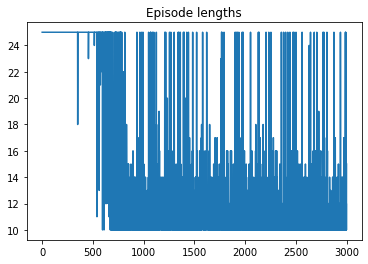

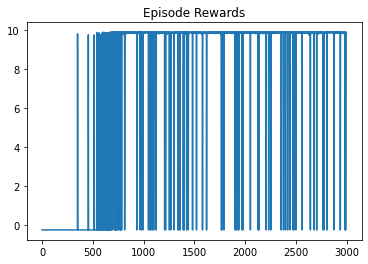

In [19]:
env = MyStatsRecorder(TimeLimit(env, max_episode_steps=25))
Q = q_learning(env, nb_episodes=3000)

episode_rewards = env.episode_rewards
episode_lengths = env.episode_lengths

# plot
plt.title("Episode lengths")
plt.plot(episode_lengths)
plt.show()

plt.title("Episode Rewards")
plt.plot(episode_rewards)
plt.show()


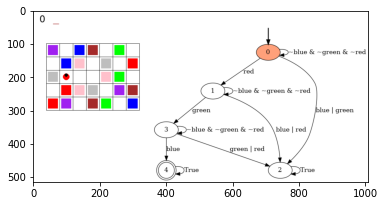

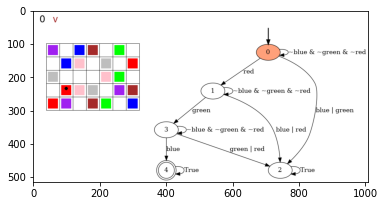

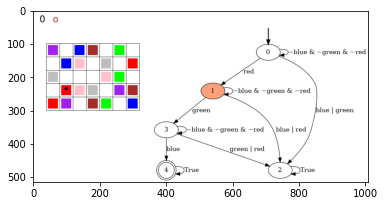

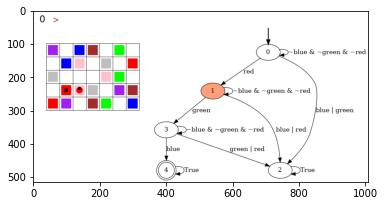

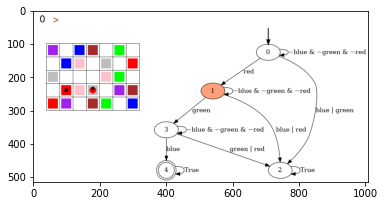

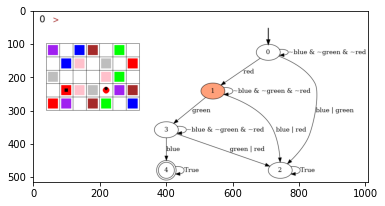

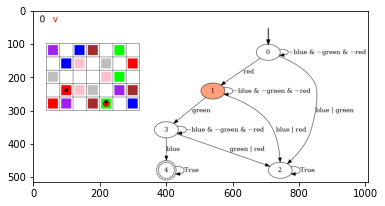

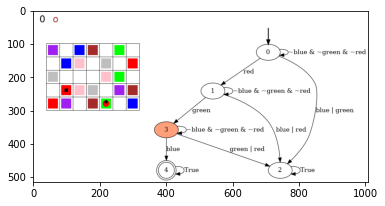

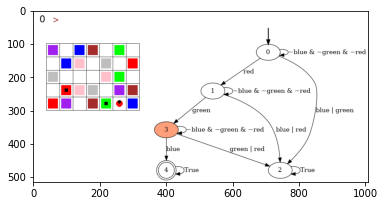

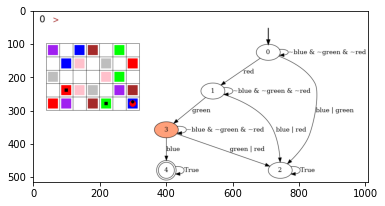

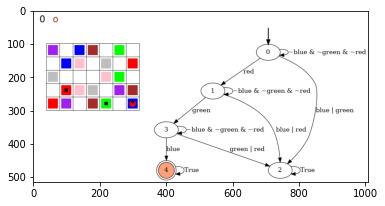

In [20]:
rollout(env, policy=lambda _env, state: np.argmax(Q[state]), callback=plot_env)

Averages of several runs...

/home/marcofavorito/.virtualenvs/multinav-EiRI4out-py3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/marcofavorito/.virtualenvs/multinav-EiRI4out-py3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/marcofavorito/.virtualenvs/multinav-EiRI4out-py3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other

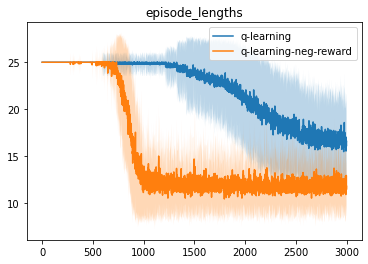

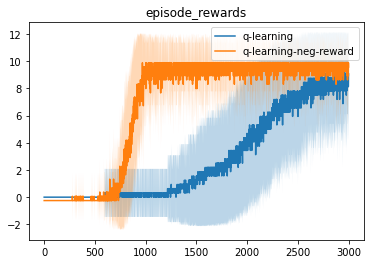

[<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>]

In [16]:
def run_experiment(
    nb_runs=32,
    nb_processes=8,
    reward_per_step=0.0,
    reward_outside_grid=0.0,
    reward_duplicate_beep=0.0,
    nb_episodes=3000,
    alpha=0.1,
    eps=0.1,
    gamma=0.9,
    learning_rate_decay=False,
    epsilon_decay=False,
):
    """Run a full experiment."""
    nb_colors = 3
    configuration = SapientinoConfiguration(
        reward_per_step=reward_per_step,
        reward_outside_grid=reward_outside_grid,
        reward_duplicate_beep=reward_duplicate_beep,
    )
    env = SingleAgentWrapper(SapientinoDictSpace(configuration))
    tg = GridSapientinoRB(nb_colors).make_sapientino_goal()
    env = SapientinoTemporalWrapper(env, [tg])
    env = MyStatsRecorder(TimeLimit(env, max_episode_steps=25))
    seeds = list(range(nb_runs))
    qlearning_params = dict(
        nb_episodes=nb_episodes,
        alpha=alpha,
        eps=eps,
        gamma=gamma,
        learning_rate_decay=learning_rate_decay,
        epsilon_decay=epsilon_decay,
    )

    experiment = Experiment(
        env, q_learning, qlearning_params, nb_runs=nb_runs,
        nb_processes=nb_processes, seeds=seeds
    )

    stats = experiment.run()
    return stats

stats_1 = run_experiment()
stats_2 = run_experiment(reward_per_step=-0.01)

plot_average_stats([stats_1, stats_2], ["q-learning", "q-learning-neg-reward"])

Results: the negative step reward
is helpful for learning.

TODO: use reward shaping from previous layer.

